In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wave
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


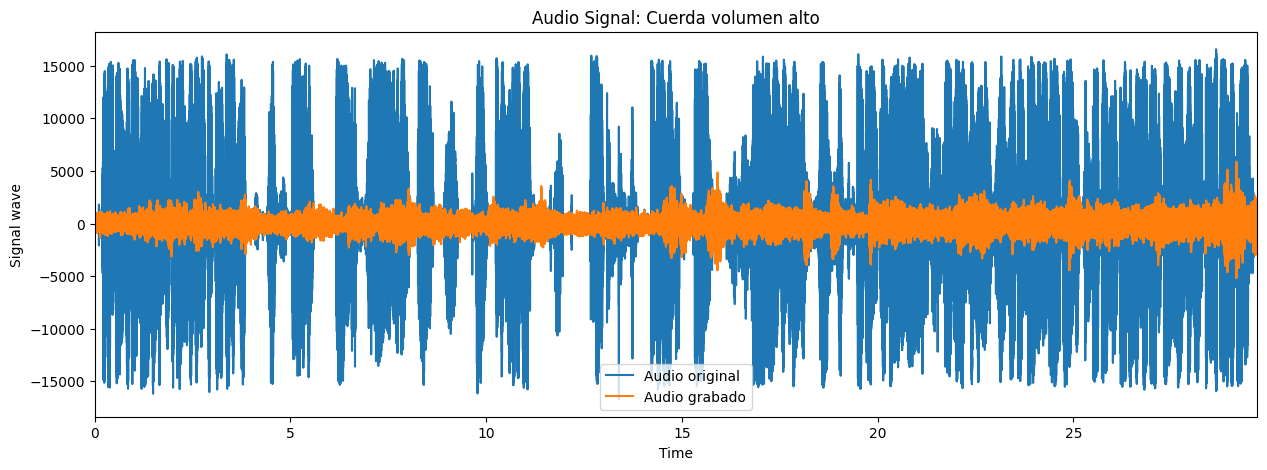

1369213
1369213
1369213
1369213
Error Cuadrático Medio (MSE): 477.42916405263463
Índice de Similitud Estructural (SSI): 0.2616880165332069


In [ ]:


def cargar_audio(ruta):
    audio = wave.open(ruta)
    sample_freq = audio.getframerate()
    n_samples = audio.getnframes()
    signal_wave = audio.readframes(-1)
    audio.close()

    audio_duration = n_samples / sample_freq

    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    times = np.linspace(0, audio_duration, num=len(signal_array))

    return times, signal_array, sample_freq, audio_duration

def igualar_duraciones(ruta_audio1, ruta_audio2):
    np.random.seed(123)  # Establecer la semilla
    times_audio1, signal_array_audio1, _, _ = cargar_audio(ruta_audio1)
    times_audio2, signal_array_audio2, _, _ = cargar_audio(ruta_audio2)

    # Ajustar tamaños de los arrays
    duracion_comun = min(times_audio1[-1], times_audio2[-1])
    signal_array_audio1 = signal_array_audio1[:len(times_audio1)]
    signal_array_audio2 = signal_array_audio2[:len(times_audio2)]

    # Determinar el tamaño mínimo de los dos arrays
    min_len = min(len(signal_array_audio1), len(signal_array_audio2))

    # Ajustar la longitud de los arrays
    if len(signal_array_audio1) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio1), len(signal_array_audio1) - min_len, replace=False)
        signal_array_audio1 = np.delete(signal_array_audio1, indices_eliminar)
        times_audio1 = np.delete(times_audio1, indices_eliminar)
    elif len(signal_array_audio2) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio2), len(signal_array_audio2) - min_len, replace=False)
        signal_array_audio2 = np.delete(signal_array_audio2, indices_eliminar)
        times_audio2 = np.delete(times_audio2, indices_eliminar)

    # Graficar los dos audios
    plt.figure(figsize=(15, 5))
    plt.plot(times_audio2, signal_array_audio2, label='Audio original')
    plt.plot(times_audio1, signal_array_audio1, label='Audio grabado')
    plt.title("Audio Signal: Cuerda volumen alto")
    plt.ylabel("Signal wave")
    plt.xlabel("Time")
    plt.xlim(0, duracion_comun)
    plt.legend()
    plt.show()

    print(len(times_audio1))
    print(len(signal_array_audio1))
    print(len(times_audio2))
    print(len(signal_array_audio2))

    # Calcular el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(signal_array_audio1, signal_array_audio2)
    print(f"Error Cuadrático Medio (MSE): {mse}")

    # Calcular el Índice de Similitud Estructural (SSI)
    ssi, _ = ssim(signal_array_audio1, signal_array_audio2, full=True)
    print(f"Índice de Similitud Estructural (SSI): {ssi}")
# Rutas a los archivos de audio
ruta_audio1 = 'data/Audios/Primera/VolAlto.wav'
ruta_audio2 = 'data/Audios/Spinning.wav'

igualar_duraciones(ruta_audio1, ruta_audio2)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


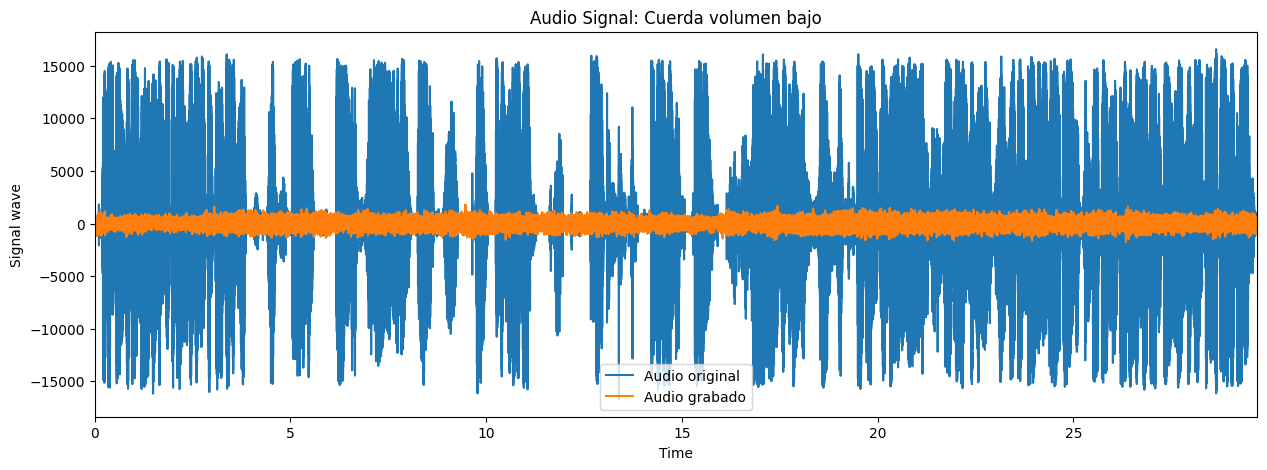

1421762
1421762
1421762
1421762
Error Cuadrático Medio (MSE): 513.2397314037089
Índice de Similitud Estructural (SSI): 0.2856711859022972


In [ ]:
def cargar_audio(ruta):
    audio = wave.open(ruta)
    sample_freq = audio.getframerate()
    n_samples = audio.getnframes()
    signal_wave = audio.readframes(-1)
    audio.close()

    audio_duration = n_samples / sample_freq

    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    times = np.linspace(0, audio_duration, num=len(signal_array))

    return times, signal_array, sample_freq, audio_duration

def igualar_duraciones(ruta_audio1, ruta_audio2):
    np.random.seed(123)  # Establecer la semilla
    times_audio1, signal_array_audio1, _, _ = cargar_audio(ruta_audio1)
    times_audio2, signal_array_audio2, _, _ = cargar_audio(ruta_audio2)

    # Ajustar tamaños de los arrays
    duracion_comun = min(times_audio1[-1], times_audio2[-1])
    signal_array_audio1 = signal_array_audio1[:len(times_audio1)]
    signal_array_audio2 = signal_array_audio2[:len(times_audio2)]

    # Determinar el tamaño mínimo de los dos arrays
    min_len = min(len(signal_array_audio1), len(signal_array_audio2))

    # Ajustar la longitud de los arrays
    if len(signal_array_audio1) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio1), len(signal_array_audio1) - min_len, replace=False)
        signal_array_audio1 = np.delete(signal_array_audio1, indices_eliminar)
        times_audio1 = np.delete(times_audio1, indices_eliminar)
    elif len(signal_array_audio2) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio2), len(signal_array_audio2) - min_len, replace=False)
        signal_array_audio2 = np.delete(signal_array_audio2, indices_eliminar)
        times_audio2 = np.delete(times_audio2, indices_eliminar)

    # Graficar los dos audios
    plt.figure(figsize=(15, 5))
    plt.plot(times_audio2, signal_array_audio2, label='Audio original')
    plt.plot(times_audio1, signal_array_audio1, label='Audio grabado')
    plt.title("Audio Signal: Cuerda volumen bajo")
    plt.ylabel("Signal wave")
    plt.xlabel("Time")
    plt.xlim(0, duracion_comun)
    plt.legend()
    plt.show()

    print(len(times_audio1))
    print(len(signal_array_audio1))
    print(len(times_audio2))
    print(len(signal_array_audio2))

    # Calcular el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(signal_array_audio1, signal_array_audio2)
    print(f"Error Cuadrático Medio (MSE): {mse}")

    # Calcular el Índice de Similitud Estructural (SSI)
    ssi, _ = ssim(signal_array_audio1, signal_array_audio2, full=True)
    print(f"Índice de Similitud Estructural (SSI): {ssi}")
# Rutas a los archivos de audio
ruta_audio1 = 'data/Audios/Primera/ValMedio.wav'
ruta_audio2 = 'data/Audios/Spinning.wav'

igualar_duraciones(ruta_audio1, ruta_audio2)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


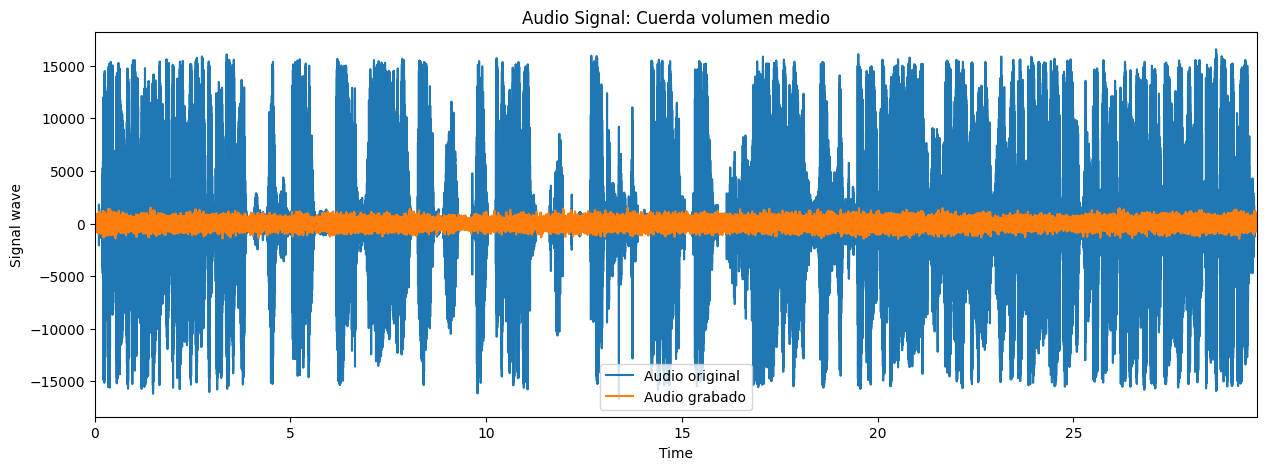

1397893
1397893
1397893
1397893
Error Cuadrático Medio (MSE): 486.8684062371011
Índice de Similitud Estructural (SSI): 0.2816305675815114


In [ ]:
def cargar_audio(ruta):
    audio = wave.open(ruta)
    sample_freq = audio.getframerate()
    n_samples = audio.getnframes()
    signal_wave = audio.readframes(-1)
    audio.close()

    audio_duration = n_samples / sample_freq

    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    times = np.linspace(0, audio_duration, num=len(signal_array))

    return times, signal_array, sample_freq, audio_duration

def igualar_duraciones(ruta_audio1, ruta_audio2):
    np.random.seed(123)  # Establecer la semilla
    times_audio1, signal_array_audio1, _, _ = cargar_audio(ruta_audio1)
    times_audio2, signal_array_audio2, _, _ = cargar_audio(ruta_audio2)

    # Ajustar tamaños de los arrays
    duracion_comun = min(times_audio1[-1], times_audio2[-1])
    signal_array_audio1 = signal_array_audio1[:len(times_audio1)]
    signal_array_audio2 = signal_array_audio2[:len(times_audio2)]

    # Determinar el tamaño mínimo de los dos arrays
    min_len = min(len(signal_array_audio1), len(signal_array_audio2))

    # Ajustar la longitud de los arrays
    if len(signal_array_audio1) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio1), len(signal_array_audio1) - min_len, replace=False)
        signal_array_audio1 = np.delete(signal_array_audio1, indices_eliminar)
        times_audio1 = np.delete(times_audio1, indices_eliminar)
    elif len(signal_array_audio2) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio2), len(signal_array_audio2) - min_len, replace=False)
        signal_array_audio2 = np.delete(signal_array_audio2, indices_eliminar)
        times_audio2 = np.delete(times_audio2, indices_eliminar)

    # Graficar los dos audios
    plt.figure(figsize=(15, 5))
    plt.plot(times_audio2, signal_array_audio2, label='Audio original')
    plt.plot(times_audio1, signal_array_audio1, label='Audio grabado')
    plt.title("Audio Signal: Cuerda volumen medio")
    plt.ylabel("Signal wave")
    plt.xlabel("Time")
    plt.xlim(0, duracion_comun)
    plt.legend()
    plt.show()

    print(len(times_audio1))
    print(len(signal_array_audio1))
    print(len(times_audio2))
    print(len(signal_array_audio2))

    # Calcular el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(signal_array_audio1, signal_array_audio2)
    print(f"Error Cuadrático Medio (MSE): {mse}")

    # Calcular el Índice de Similitud Estructural (SSI)
    ssi, _ = ssim(signal_array_audio1, signal_array_audio2, full=True)
    print(f"Índice de Similitud Estructural (SSI): {ssi}")
# Rutas a los archivos de audio
ruta_audio1 = 'data/Audios/Primera/VolBajo.wav'
ruta_audio2 = 'data/Audios/Spinning.wav'

igualar_duraciones(ruta_audio1, ruta_audio2)

$Fique$











/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


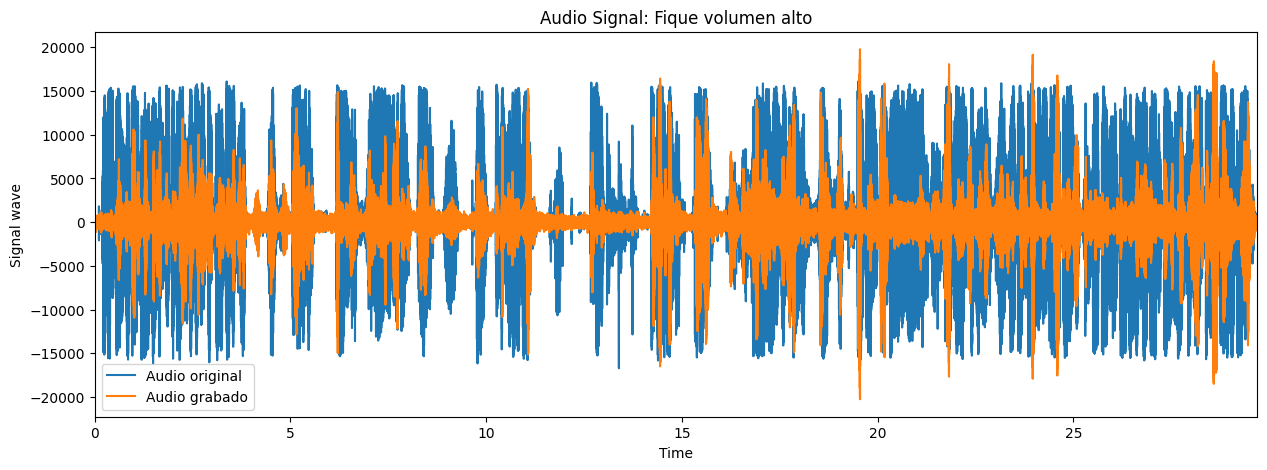

1369830
1369830
1369830
1369830
Error Cuadrático Medio (MSE): 375.80429031339656
Índice de Similitud Estructural (SSI): 0.20779767799815918


In [ ]:
def cargar_audio(ruta):
    audio = wave.open(ruta)
    sample_freq = audio.getframerate()
    n_samples = audio.getnframes()
    signal_wave = audio.readframes(-1)
    audio.close()

    audio_duration = n_samples / sample_freq

    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    times = np.linspace(0, audio_duration, num=len(signal_array))

    return times, signal_array, sample_freq, audio_duration

def igualar_duraciones(ruta_audio1, ruta_audio2):
    np.random.seed(123)  # Establecer la semilla
    times_audio1, signal_array_audio1, _, _ = cargar_audio(ruta_audio1)
    times_audio2, signal_array_audio2, _, _ = cargar_audio(ruta_audio2)

    # Ajustar tamaños de los arrays
    duracion_comun = min(times_audio1[-1], times_audio2[-1])
    signal_array_audio1 = signal_array_audio1[:len(times_audio1)]
    signal_array_audio2 = signal_array_audio2[:len(times_audio2)]

    # Determinar el tamaño mínimo de los dos arrays
    min_len = min(len(signal_array_audio1), len(signal_array_audio2))

    # Ajustar la longitud de los arrays
    if len(signal_array_audio1) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio1), len(signal_array_audio1) - min_len, replace=False)
        signal_array_audio1 = np.delete(signal_array_audio1, indices_eliminar)
        times_audio1 = np.delete(times_audio1, indices_eliminar)
    elif len(signal_array_audio2) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio2), len(signal_array_audio2) - min_len, replace=False)
        signal_array_audio2 = np.delete(signal_array_audio2, indices_eliminar)
        times_audio2 = np.delete(times_audio2, indices_eliminar)

    # Graficar los dos audios
    plt.figure(figsize=(15, 5))
    plt.plot(times_audio2, signal_array_audio2, label='Audio original')
    plt.plot(times_audio1, signal_array_audio1, label='Audio grabado')
    plt.title("Audio Signal: Fique volumen alto")
    plt.ylabel("Signal wave")
    plt.xlabel("Time")
    plt.xlim(0, duracion_comun)
    plt.legend()
    plt.show()

    print(len(times_audio1))
    print(len(signal_array_audio1))
    print(len(times_audio2))
    print(len(signal_array_audio2))

    # Calcular el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(signal_array_audio1, signal_array_audio2)
    print(f"Error Cuadrático Medio (MSE): {mse}")

    # Calcular el Índice de Similitud Estructural (SSI)
    ssi, _ = ssim(signal_array_audio1, signal_array_audio2, full=True)
    print(f"Índice de Similitud Estructural (SSI): {ssi}")
# Rutas a los archivos de audio
ruta_audio1 = 'data/Audios/Tercera/VoluAlto_1.wav'
ruta_audio2 = 'data/Audios/Spinning.wav'

igualar_duraciones(ruta_audio1, ruta_audio2)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


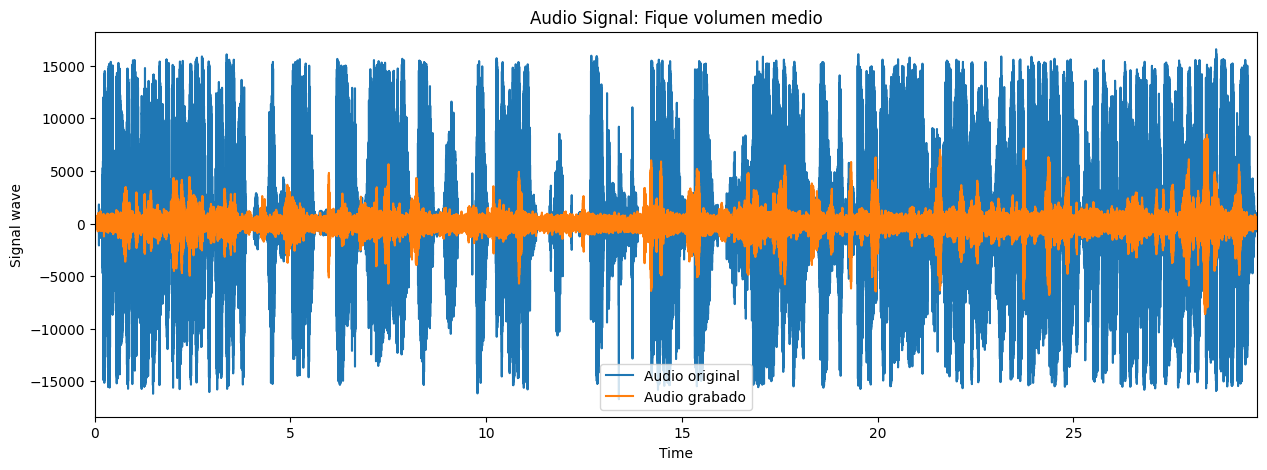

1372764
1372764
1372764
1372764
Error Cuadrático Medio (MSE): 508.8607553811143
Índice de Similitud Estructural (SSI): 0.261775349521079


In [ ]:
def cargar_audio(ruta):
    audio = wave.open(ruta)
    sample_freq = audio.getframerate()
    n_samples = audio.getnframes()
    signal_wave = audio.readframes(-1)
    audio.close()

    audio_duration = n_samples / sample_freq

    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    times = np.linspace(0, audio_duration, num=len(signal_array))

    return times, signal_array, sample_freq, audio_duration

def igualar_duraciones(ruta_audio1, ruta_audio2):
    np.random.seed(123)  # Establecer la semilla
    times_audio1, signal_array_audio1, _, _ = cargar_audio(ruta_audio1)
    times_audio2, signal_array_audio2, _, _ = cargar_audio(ruta_audio2)

    # Ajustar tamaños de los arrays
    duracion_comun = min(times_audio1[-1], times_audio2[-1])
    signal_array_audio1 = signal_array_audio1[:len(times_audio1)]
    signal_array_audio2 = signal_array_audio2[:len(times_audio2)]

    # Determinar el tamaño mínimo de los dos arrays
    min_len = min(len(signal_array_audio1), len(signal_array_audio2))

    # Ajustar la longitud de los arrays
    if len(signal_array_audio1) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio1), len(signal_array_audio1) - min_len, replace=False)
        signal_array_audio1 = np.delete(signal_array_audio1, indices_eliminar)
        times_audio1 = np.delete(times_audio1, indices_eliminar)
    elif len(signal_array_audio2) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio2), len(signal_array_audio2) - min_len, replace=False)
        signal_array_audio2 = np.delete(signal_array_audio2, indices_eliminar)
        times_audio2 = np.delete(times_audio2, indices_eliminar)

    # Graficar los dos audios
    plt.figure(figsize=(15, 5))
    plt.plot(times_audio2, signal_array_audio2, label='Audio original')
    plt.plot(times_audio1, signal_array_audio1, label='Audio grabado')
    plt.title("Audio Signal: Fique volumen medio")
    plt.ylabel("Signal wave")
    plt.xlabel("Time")
    plt.xlim(0, duracion_comun)
    plt.legend()
    plt.show()

    print(len(times_audio1))
    print(len(signal_array_audio1))
    print(len(times_audio2))
    print(len(signal_array_audio2))

    # Calcular el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(signal_array_audio1, signal_array_audio2)
    print(f"Error Cuadrático Medio (MSE): {mse}")

    # Calcular el Índice de Similitud Estructural (SSI)
    ssi, _ = ssim(signal_array_audio1, signal_array_audio2, full=True)
    print(f"Índice de Similitud Estructural (SSI): {ssi}")
# Rutas a los archivos de audio
ruta_audio1 = 'data/Audios/Tercera/VoluMedio_1.wav'
ruta_audio2 = 'data/Audios/Spinning.wav'

igualar_duraciones(ruta_audio1, ruta_audio2)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


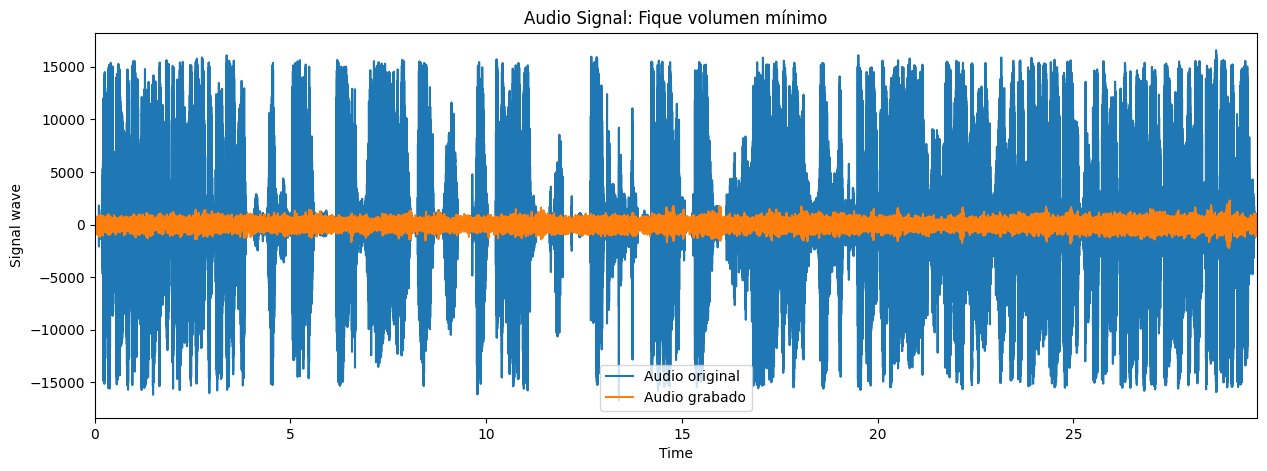

1371667
1371667
1371667
1371667
Error Cuadrático Medio (MSE): 531.9406313631515
Índice de Similitud Estructural (SSI): 0.2907633501063159


In [ ]:
def cargar_audio(ruta):
    audio = wave.open(ruta)
    sample_freq = audio.getframerate()
    n_samples = audio.getnframes()
    signal_wave = audio.readframes(-1)
    audio.close()

    audio_duration = n_samples / sample_freq

    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    times = np.linspace(0, audio_duration, num=len(signal_array))

    return times, signal_array, sample_freq, audio_duration

def igualar_duraciones(ruta_audio1, ruta_audio2):
    np.random.seed(123)  # Establecer la semilla
    times_audio1, signal_array_audio1, _, _ = cargar_audio(ruta_audio1)
    times_audio2, signal_array_audio2, _, _ = cargar_audio(ruta_audio2)

    # Ajustar tamaños de los arrays
    duracion_comun = min(times_audio1[-1], times_audio2[-1])
    signal_array_audio1 = signal_array_audio1[:len(times_audio1)]
    signal_array_audio2 = signal_array_audio2[:len(times_audio2)]

    # Determinar el tamaño mínimo de los dos arrays
    min_len = min(len(signal_array_audio1), len(signal_array_audio2))

    # Ajustar la longitud de los arrays
    if len(signal_array_audio1) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio1), len(signal_array_audio1) - min_len, replace=False)
        signal_array_audio1 = np.delete(signal_array_audio1, indices_eliminar)
        times_audio1 = np.delete(times_audio1, indices_eliminar)
    elif len(signal_array_audio2) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio2), len(signal_array_audio2) - min_len, replace=False)
        signal_array_audio2 = np.delete(signal_array_audio2, indices_eliminar)
        times_audio2 = np.delete(times_audio2, indices_eliminar)

    # Graficar los dos audios
    plt.figure(figsize=(15, 5))
    plt.plot(times_audio2, signal_array_audio2, label='Audio original')
    plt.plot(times_audio1, signal_array_audio1, label='Audio grabado')
    plt.title("Audio Signal: Fique volumen mínimo")
    plt.ylabel("Signal wave")
    plt.xlabel("Time")
    plt.xlim(0, duracion_comun)
    plt.legend()
    plt.show()

    print(len(times_audio1))
    print(len(signal_array_audio1))
    print(len(times_audio2))
    print(len(signal_array_audio2))

    # Calcular el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(signal_array_audio1, signal_array_audio2)
    print(f"Error Cuadrático Medio (MSE): {mse}")

    # Calcular el Índice de Similitud Estructural (SSI)
    ssi, _ = ssim(signal_array_audio1, signal_array_audio2, full=True)
    print(f"Índice de Similitud Estructural (SSI): {ssi}")
# Rutas a los archivos de audio
ruta_audio1 = 'data/Audios/Tercera/VoluBajo_1.wav'
ruta_audio2 = 'data/Audios/Spinning.wav'

igualar_duraciones(ruta_audio1, ruta_audio2)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


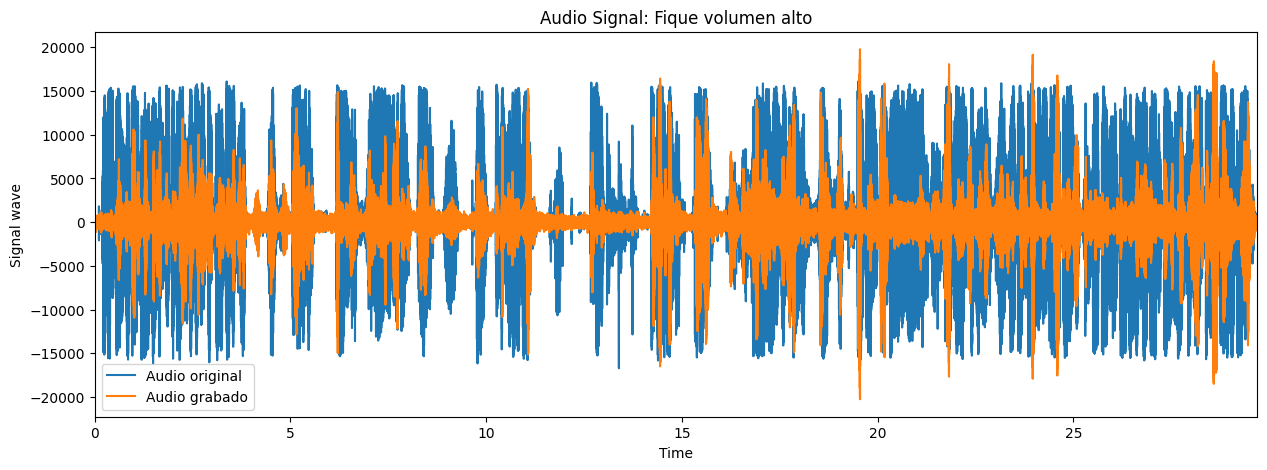

1369830
1369830
1369830
1369830
Error Cuadrático Medio (MSE): 375.80429031339656
Índice de Similitud Estructural (SSI): 0.20779767799815918


In [ ]:
import numpy as np
import wave
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def cargar_audio(ruta):
    audio = wave.open(ruta)
    sample_freq = audio.getframerate()
    n_samples = audio.getnframes()
    signal_wave = audio.readframes(-1)
    audio.close()

    audio_duration = n_samples / sample_freq

    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    times = np.linspace(0, audio_duration, num=len(signal_array))

    return times, signal_array, sample_freq, audio_duration

def igualar_duraciones(ruta_audio1, ruta_audio2):
    np.random.seed(123)  # Establecer la semilla

    times_audio1, signal_array_audio1, _, _ = cargar_audio(ruta_audio1)
    times_audio2, signal_array_audio2, _, _ = cargar_audio(ruta_audio2)

    # Ajustar tamaños de los arrays
    duracion_comun = min(times_audio1[-1], times_audio2[-1])
    signal_array_audio1 = signal_array_audio1[:len(times_audio1)]
    signal_array_audio2 = signal_array_audio2[:len(times_audio2)]

    # Determinar el tamaño mínimo de los dos arrays
    min_len = min(len(signal_array_audio1), len(signal_array_audio2))

    # Ajustar la longitud de los arrays
    if len(signal_array_audio1) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio1), len(signal_array_audio1) - min_len, replace=False)
        signal_array_audio1 = np.delete(signal_array_audio1, indices_eliminar)
        times_audio1 = np.delete(times_audio1, indices_eliminar)
    elif len(signal_array_audio2) > min_len:
        indices_eliminar = np.random.choice(len(signal_array_audio2), len(signal_array_audio2) - min_len, replace=False)
        signal_array_audio2 = np.delete(signal_array_audio2, indices_eliminar)
        times_audio2 = np.delete(times_audio2, indices_eliminar)

    # Graficar los dos audios
    plt.figure(figsize=(15, 5))
    plt.plot(times_audio2, signal_array_audio2, label='Audio original')
    plt.plot(times_audio1, signal_array_audio1, label='Audio grabado')
    plt.title("Audio Signal: Fique volumen alto")
    plt.ylabel("Signal wave")
    plt.xlabel("Time")
    plt.xlim(0, duracion_comun)
    plt.legend()
    plt.show()

    print(len(times_audio1))
    print(len(signal_array_audio1))
    print(len(times_audio2))
    print(len(signal_array_audio2))

    # Calcular el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(signal_array_audio1, signal_array_audio2)
    print(f"Error Cuadrático Medio (MSE): {mse}")

    # Calcular el Índice de Similitud Estructural (SSI)
    ssi, _ = ssim(signal_array_audio1, signal_array_audio2, full=True)
    print(f"Índice de Similitud Estructural (SSI): {ssi}")

# Rutas a los archivos de audio
ruta_audio1 = 'data/Audios/Tercera/VoluAlto_1.wav'
ruta_audio2 = 'data/Audios/Spinning.wav'

igualar_duraciones(ruta_audio1, ruta_audio2)
